In [1]:
import sys
sys.path.append('../src')

In [2]:
from source import *

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
selected_columns_df = pd.read_csv('../src/selected_columns.csv')

In [5]:
X = selected_columns_df[['gender', 'samerace', 'field', 'like', 'met',  'age_diff', 'sinsere_o', 'ambitous_o', 'funny_o']]
Y = selected_columns_df['match']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
np.random.seed(0)
RF = RandomForestClassifier(n_estimators=100, max_depth=None)
RF.fit(np.array(X_train),np.array(y_train))
y_pred = RF.predict(np.array(X_test))

In [8]:
match_rate = RF.predict_proba(np.array(X_test))[:,1]
age_diff = abs(X_test['age_diff'])

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8190
Precision: 0.7888
Recall: 0.8190
F1 Score: 0.7955
Confusion Matrix:
[[162  10]
 [ 28  10]]


In [10]:
weight = np.floor(age_diff).astype(int)

In [11]:
weight = weight.tolist()

In [12]:
match_rate = match_rate*100

In [13]:
value = match_rate.astype(int)

In [14]:
onePerEach(weight, value, 20, 10)

(735,
 [1, 9, 33, 52, 91, 138, 145, 150, 153, 180],
 [64, 77, 68, 64, 87, 59, 83, 81, 72, 80])

In [15]:
data = np.sort(value)[-10:]
data

array([62, 64, 64, 68, 72, 77, 80, 81, 83, 87])

In [16]:
sum(data)

738

In [17]:
out_put_knapsack = onePerEach(weight, value, 20, 10)[2]

In [18]:
out_put_knapsack

[64, 77, 68, 64, 87, 59, 83, 81, 72, 80]

In [19]:
value
len(value[value > 58])

11

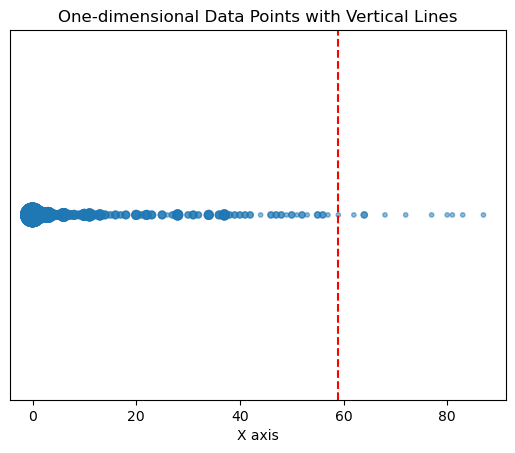

<Figure size 800x600 with 0 Axes>

In [20]:
from collections import Counter


counts = Counter(value)

sizes = [counts[x]*10 for x in value]

plt.scatter(value, np.zeros_like(value), s=sizes, alpha=0.5)


plt.axvline(x=59, color='red', linestyle='--')


plt.yticks([])


plt.xlabel('X axis')


plt.title('One-dimensional Data Points with Vertical Lines')

plt.figure(figsize=(8, 6))

plt.show()

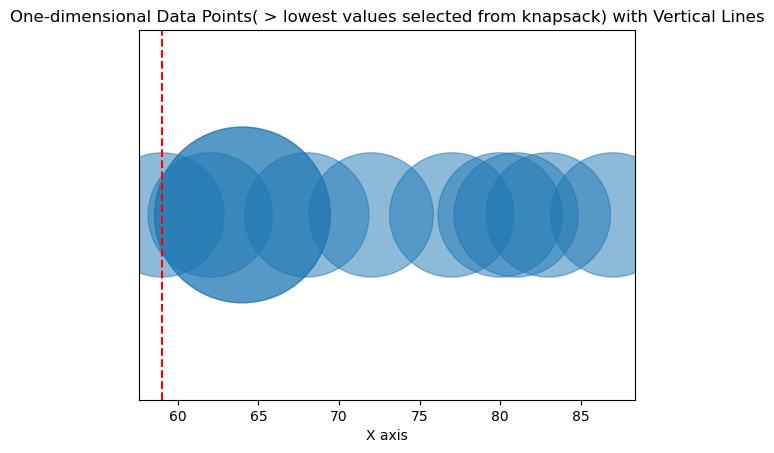

<Figure size 800x600 with 0 Axes>

In [22]:
from collections import Counter


counts = Counter(value)

sizes = [counts[x]*10 for x in value]

filter_data = value[value > 58]
filter_sizes = [counts[x]*8000 for x in filter_data]

plt.scatter(filter_data, np.zeros_like(filter_data), s=filter_sizes, alpha=0.5)


plt.axvline(x=59, color='red', linestyle='--')


plt.yticks([])


plt.xlabel('X axis')



plt.title('One-dimensional Data Points( > lowest values selected from knapsack) with Vertical Lines')

plt.figure(figsize=(8, 6))

plt.show()
